# Model solutions for mock class test



## Q1

A brine solution (a mixture of salt and water) begins to flow at a
constant rate of $\dot{V}_{\rm brine}=6\,{\rm L\,min}^{-1}$ into a
cylindrical tank of diameter $D=1.5\,{\rm m}$ that initially holds
$V_0=1000\,{\rm L}$ of pure water.  The solution inside the tank is
kept well stirred and flows out of the tank with a velocity $v=K h$,
where $K=0.05\,{\rm s^{-1}}$ and $h$ is the height of the liquid
level, through an outlet of cross-sectional area $A_0=25\,{\rm cm}^2$.
The concentration of salt in the brine entering the tank is
$c_{\rm brine}=0.1\,{\rm kg\,L}^{-1}$.


1. Derive a differential equation that governs the
  height of the liquid level in the tank with time.  State associated
  the initial condition.  What is the steady-state height of the
  liquid level in the tank?
2. Solve, either analytically or numerically, for the variation of
  the height of the liquid level in the tank with time.
3. Derive the differential equation that governs the variation of the
  brine concentration in the tank with time.
4. Determine, either analytically or numerically, the brine
  concentration in the tank with time, and plot the concentration of
  the brine in the tank from time $0$ to $24\,{\rm hrs}$.





## Model solutions for Q1


### Part 1:

Performing a balance on the volume of liquid in the tank, we find
\begin{align*}
A\frac{dh}{dt} 
&= \dot{V}_{\rm in} - K A_0 h
\\
&= \dot{V}_{\rm in} \left(1 - \frac{K A_0 h}{\dot{V}_{\rm in}} \right)
\end{align*}

The tank initially holds $V_0=1000\,{\rm L}$ of liquid.  The corresponding height $h_0$ of the liquid in the tank is 
\begin{align*}
V_0 &= A h_0 = \frac{\pi D^2 h_0}{4}
\\
h_0 &= \frac{4 V_0}{\pi D^2}
\end{align*}
where $A=\pi D^2/4$ is the cross-sectional area of the tank.

In [19]:
import numpy as np

D = 1.5      # tank diameter / m
V0 = 1000.0  # initial liquid volume / L
V0 /= 1000.0 # initial liquid volume / m^3


A = np.pi * D**2 / 4.0
h0 = V0 / A  # initial liquid height

print(f'initial liquid height = {h0} m')





initial liquid height = 0.5658842421045168 m




When the system has achieved teady-state, its properties should not change with time.  This implies that the time derivative of the liquid level in the tank should be zero.  The height $h_\infty$ at which this occurs is:
\begin{align*}
1 - \frac{K A_0 h_\infty}{\dot{V}_{\rm in}} &= 0
\\
h_\infty &= \frac{\dot{V}_{\rm in}}{K A_0}
\end{align*}

In [20]:
K = 5.0e-2    # s^{-1}
A0 = 25.0 * 1.0e-4  # outlet area / m^2
dotVin = 6               # L min^{-1}
dotVin *= 1.0e-3 / 60.0  # m^3 s^{-1}

h_inf = dotVin / (K*A0)
print(f'steady state height = {h_inf} m')





steady state height = 0.8 m


1### Part 2:

\begin{align*}
A\frac{dh}{dt} 
&= \dot{V}_{\rm in} \left(1 - \frac{K A_0}{\dot{V}_{\rm in}} h\right)
\\
\frac{A}{\dot{V}_{\rm in} }\frac{dh}{dt} 
&= 1 - \frac{K A_0}{\dot{V}_{\rm in}} h
\\
\frac{A h_\infty}{\dot{V}_{\rm in} }
\frac{d}{dt} \left(\frac{h}{h_\infty}\right)
&= 1 - \frac{h}{h_\infty} 
\end{align*}


This suggests that we introduce a time scale $\tau=A h_\infty/\dot{V}_{\rm in}$ and use the length scale $h_\infty$.  Introducing dimensionless variables  $y=h/h_\infty$ and $x=t/\tau$, we find
\begin{align*}
\tau
\frac{d}{dt} \left(\frac{h}{h_\infty}\right)
&= 1 - \frac{h}{h_\infty} 
\\
\frac{dy}{dx} &= 1 - y
\end{align*}
This equation can be easily integrated to give
\begin{align*}
\frac{dy}{1-y} &= dx
\\
- \ln |1-y| &= x + C
\end{align*}
where $C$ is an integration constant.  Using the initial condition that $y(0)=h_0/h_\infty$, we find
\begin{align*}
- \ln |1-h_0/h_\infty| &= 0 + C
\\
C &= -\ln|1-h_0/h_\infty|
\end{align*}
Substituting back into the solution, we find
\begin{align*}
- \ln |1-y| &= x - \ln|1-h_0/h_\infty|
\\
|1-y(x)| &= |1-h_0/h_\infty| e^{-x} 
\\
y(x) &= 1 - |1-h_0/h_\infty| e^{-x} .
\end{align*}
In terms of dimensional variables, this gives
\begin{align*}
\frac{h(t)}{h_\infty} 
&= 1 - |1-h_0/h_\infty| e^{-t/\tau}
\\
h(t) &= h_\infty - (h_\infty - h_0) e^{-t/\tau}
\end{align*}

In [21]:
tau = (A*h_inf) / dotVin
print(f'tau = {tau} s')

tau = 14137.166941154068 s


### Part 3:

We define $V$ as the volume of liquid in the tank, and $c$ as the concentration of salt in the tank.  Performing a balance on the mass of salt in the tank, we find
\begin{align*}
\frac{d}{dt}(Vc) &= \dot{V}_{\rm in} c_{\rm in}
- A_0 K h(t) c(t)
\\
\frac{dV}{dt}c + V\frac{dc}{dt} &= \dot{V}_{\rm in} c_{\rm in}
- A_0 K h(t) c(t) 
\\
V\frac{dc}{dt} &= \dot{V}_{\rm in} c_{\rm in}
- A_0 K h(t) c(t) - \frac{dV}{dt}c
\\
V\frac{dc}{dt} &= \dot{V}_{\rm in} c_{\rm in}
- A_0 K h(t) c(t) - [\dot{V}_{\rm in} - A_0 K h(t)]c
\\
&= \dot{V}_{\rm in} c_{\rm in}
- \dot{V}_{\rm in} c
\\
A h(t) \frac{dc}{dt} &= \dot{V}_{\rm in} [c_{\rm in} - c]
\end{align*}


### Part 4:

Before we solve this differential equation, we first rewrite it in a
more simplified form:
\begin{align*}
\frac{1}{c_{\rm in} - c}\frac{dc}{dt} 
&= \frac{\dot{V}_{\rm in}}{V(t)} 
= \frac{\dot{V}_{\rm in}}{A h(t)} 
\\
\frac{1}{1 - c/c_{\rm in}}\frac{d}{dt} \left(\frac{c}{c_{\rm in}}\right)
&= \frac{\dot{V}_{\rm in}}{A h_\infty} \frac{h_\infty}{h(t)}
= \frac{1}{\tau} \frac{h_\infty}{h(t)}
\end{align*}
This strongly suggests that we introduce a dimensionless concentration
$z(x)=c(t)/c_{\rm in}$, where $x=t/\tau$.  This then gives:
\begin{align*}
\frac{1}{1-z(x)} \frac{dC}{dx} &= \frac{1}{y(x)}
\end{align*}
This equation can be directly integrated:
\begin{align*}
\frac{dz}{1-z} &= \frac{dx}{y(x)} 
= \frac{dx}{1-|1-y_0|e^{-x}}
= \frac{e^xdx}{e^x-|1-y_0|}
\\
- \ln(1-z) &= \ln (e^x-|1-y_0|) + C'
\end{align*}
where $C'$ is an integration constant, which can be determined from
the initial condition $z(0)=0$:
\begin{align*}
- \ln(1-0) &= \ln (e^{0}-|1-y_0|) + C'
\\
C' &= - \ln y_0
\end{align*}
The final solution is:
\begin{align*}
- \ln(1-z) &= \ln (e^x-|1-y_0|) - \ln y_0
\\
1-z(x) &= \frac{y_0}{e^x-|1-y_0|}
\\
z(x) &= 1- \frac{y_0}{e^x-|1-y_0|}
= \frac{e^x-|1-y_0|-y_0}{e^x-|1-y_0|}
\\
&= \frac{e^x-1}{e^x-|1-y_0|}
\\
&= \frac{1-e^{-x}}{1-(1-y_0)e^{-x}}
\end{align*}
In dimensional form, this is
\begin{align*}
c(t) &= \frac{c_{\rm in}(1-e^{-t/\tau})}{1-(1-h_0/h_\infty)e^{-t/\tau}}
\end{align*}


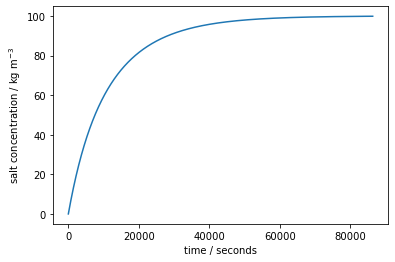

In [22]:
import pylab as plt
import numpy as np

cin = 0.1      # inlet salt concentration / kg L^{-1}
cin *= 1000.0  # inlet salt concentration / kg m^{-3}
y0 = h0/h_inf

dt = 1.0
tmax = 24.0*3600.0
t_data = np.arange(0.0, tmax, dt)
x_data = [t/tau for t in t_data]
z_data = [(1-np.exp(-x))/(1-(1-y0)*np.exp(-x)) for x in x_data]
c_data = [z*cin for z in z_data]

plt.plot(t_data, c_data)
plt.xlabel(r'time / seconds')
plt.ylabel(r'salt concentration / kg m$^{-3}$')
plt.show()


## Q2

Determine the solutions to the following differential equations:
1. $\displaystyle
  \frac{dy}{dx} + 2xy = x
  $
2.   $\displaystyle
  \frac{d^2y}{dx^2} - 4\frac{dy}{dx} + 4y = x e^{2x}
  $
  where $y(0)=0$ and $y'(0)=0$.
 


## Model solutions for Q2

### Part 1

\begin{align*}
\frac{dy}{dx} + 2xy &= x
\\
\frac{dy}{dx} &= x - 2xy = x(1-2y)
\\
\frac{dy}{1-2y} &= x dx
\\
-\frac{1}{2}\ln|1-2y| &= \frac{x^2}{2} + C
\\
\ln|1-2y| &= -x^2 - 2C
\\
|1-2y| &= e^{-x^2 - 2C}
\end{align*}
where $C$ is an integration constant.  

If $y<1/2$:
\begin{align*}
1-2y(x) &= e^{-x^2 - 2C}
\\
y(x) &= \frac{1}{2}(1-e^{-x^2 - 2C})
.
\end{align*}
If $y>1/2$:
\begin{align*}
2y(x)-1 &= e^{-x^2 - 2C}
\\
y(x) &= \frac{1}{2}(1+e^{-x^2 - 2C})
.
\end{align*}

### Part 2

This is a linear second order differential equation with constant coefficients.  The associated homogeneous equation is
\begin{align*}
\frac{d^2y}{dx^2} - 4\frac{dy}{dx} + 4y &= 0
\end{align*}
Its solutions will have the form $e^{\lambda x}$, where $\lambda$ is a solution of the quadratic equation
\begin{align*}
\lambda^2 - 4\lambda + 4 &= 0
\\
(\lambda - 2)^2 &= 0
\end{align*}
which has a double root $\lambda=2$.  Therefore, the two homogeneous solutions are:
\begin{align*}
y_{h1}(x) &= e^{2x}
\\
y_{h2}(x) &= x e^{2x}
\end{align*}

To find the particular solution, we first need
\begin{align*}
W(x) &= y_{h1}'(x) y_{h2}(x) - y_{h1}(x) y_{h2}'(x)
\\
&= x e^{2x} 2 e^{2x} - [e^{2x} + 2xe^{2x}] e^{2x} 
\\
&= - e^{4x}
.
\end{align*}

\begin{align*}
u_1'(x) &= f(x) \frac{y_{h2}(x)}{W(x)}
= xe^{2x} \frac{xe^{2x}}{-e^{4x}} = -x^2
\\
u_1(x) &= -\frac{x^3}{3}
\end{align*}
and
\begin{align*}
u_2'(x) &= - f(x) \frac{y_{h1}(x)}{W(x)}
= - xe^{2x} \frac{e^{2x}}{-e^{4x}} = x
\\
u_2(x) &= \frac{x^2}{2}
\end{align*}

The particular solution is 
\begin{align*}
y_p(x) &= u_1(x) y_{h1}(x) + u_2(x) y_{h2}(x)
\\
&= -\frac{x^3}{3} e^{2x} + \frac{x^2}{2} x e^{2x}
\\
&= \frac{x^3}{6} e^{2x}
\end{align*}
The general solution is then:
\begin{align*}
y(x) &= \frac{x^3}{6} e^{2x}
+ C_1 e^{2x} + C_2 x e^{2x}
\end{align*}

To satisfy the initial conditions, we need to solve for the values of $C_1$ and $C_2$ that statisfy the two initial conditions $y(0)=0$ and $y'(0)=0$.  We note that actually, the particular solution automatically satisfies the initial conditions, so the final solution is:
\begin{align*}
y(x) &= \frac{x^3}{6} e^{2x}
\end{align*}